# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename, header=0)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose to use the cencus data in 'adultDataSet_filename'
2. I will be predicting a person's marital-status
3. This is a supervised multi-class classification problem.
4. My features are everything excpet for the label and 'fnlwgt'
5. This is an important problem because a person's marital-status influences their lifestyle choices, purchases, and financial priorities. By being able to predict a person's marital-status, a company would be able to product targeted advertisments for differnt martial-statuses. This increases the chances of someone buying or subscribing to their product and maximizes the use of resources and effectiveness of ads. For example, a dating app could have personalized features based off these predictions, without asking for someone's marital status, which could be sensitive information. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


In [6]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [7]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex_selfID            2
capital-gain        106
capital-loss         92
hours-per-week       94
native-country       41
income_binary         2
dtype: int64

after some research 'education' and 'education-nums' represent the same data. 'education' can be removed as 'education-nums' is the numerical version of the data.

In [8]:
# distribution of values for label
df['marital-status'].value_counts(dropna=False)

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [9]:
# non numerical features 
df.select_dtypes(include='object').nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
native-country    41
income_binary      2
dtype: int64

In [10]:
# check if theres missing values
np.sum(df.isnull(), axis = 0)

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [11]:
# check for duplicates
for col in df.select_dtypes(include='object'):
    print(col)
    print(df[col].value_counts())
    print()

df.duplicated().sum()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
A

22

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. After some research I decided to exclude 'fnlwgt' as it contains statistics on the distribution of data and is not relavent to what I'm trying to predict. I will also remove 'education' as 'education_num' is a better representation of eduaction. My features will include all the columns except for the label, 'fnlwgt', and 'education'.
2. I will remove duplicates, winsorsize outliers, and address missing values by replacing numerical missing values with means and medians and categorical missing values with 'Unknown'. I would also perform one-hot-encoding for categorical data. For 'native-country', since theres alot of values, I will regroup by region before one-hot-encoding. I would then normalize the numerical features for consistency.
5. I would use a Logistic regression model to predict a multi-class output.
6. I will clean and preprocess the dataset, handling missing values, encoding categorical variables, and normalizing numerical features. I'll split the data into training, validation, and test sets, find the best number of features using auc values, then train a logistic regression model, using regularization to prevent overfitting. The model will be evaluated using metrics like accuracy, precision, recall, and confusion matrix, with cross-validation. I'll tune hyperparameters using a gridsearch. After selecting the best version based on the gridsearch, I’ll evaluate it on the test set to estimate its performance.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
import scipy.stats as stats

from sklearn.feature_selection import SelectKBest, f_classif

import time

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

#### Remove unwanted features + Group label values

In [13]:
df.drop(columns=['education', 'fnlwgt'], inplace=True)

In [14]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

The value distributions are very imbalanced. I'll regroup them into 4 categories to even out the distribution.

In [15]:
marital_status_mapping = {
    "Married-civ-spouse": "Married_together",
    "Married-AF-spouse": "Married_together",
    "Married-spouse-absent": "Married_apart",
    "Separated": "Married_apart",
    "Divorced": "Previously married",
    "Widowed": "Previously married",
    # "Never-married": "Never married"
}

df['marital-status'] = df['marital-status'].replace(marital_status_mapping)
df['marital-status'].value_counts()

Married_together      14999
Never-married         10683
Previously married     5436
Married_apart          1443
Name: marital-status, dtype: int64

#### Handle duplicates

In [16]:
df.duplicated().sum()

3432

In [17]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

#### Handle missing values

In [18]:
# find cols with missing numerical data
nan_cols = df.columns[df.isnull().any()]

df[nan_cols].dtypes

age               float64
workclass          object
occupation         object
hours-per-week    float64
native-country     object
dtype: object

In [19]:
# create new cols for cols with missing data
for col in nan_cols:
    df[col + '_na'] = df[col].isnull()
list(df.columns)

['age',
 'workclass',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income_binary',
 'age_na',
 'workclass_na',
 'occupation_na',
 'hours-per-week_na',
 'native-country_na']

In [20]:
# mean for age and median for hours-per-week
mean_ages=df['age'].mean()
median_hours = df['hours-per-week'].median()
print('mean age: ' + str(mean_ages))
print('median hours: ' + str(median_hours))

# fill missing vals with mean/median
df['age'].fillna(value=mean_ages, inplace=True)
df['hours-per-week'].fillna(value=median_hours, inplace=True)

df[nan_cols].isnull().any()

mean age: 39.23637618636756
median hours: 40.0


age               False
workclass          True
occupation         True
hours-per-week    False
native-country     True
dtype: bool

In [21]:
# distribution of values for workclass
df['workclass'].value_counts(dropna=False)

Private             19648
Self-emp-not-inc     2474
Local-gov            2038
NaN                  1639
State-gov            1273
Self-emp-inc         1089
Federal-gov           947
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [22]:
# reduce number of values in 'workclass'

# mask for self emp/not self emp
cols_self_emp = (df['workclass'] == 'Self-emp-not-inc') | (df['workclass'] == 'Self-emp-inc')
cols_not_self_emp = ~(df['workclass'] == 'Self-emp-not-inc') & ~(df['workclass'] == 'Self-emp-inc') & ~(df['workclass'].isnull())

# rename values to 'Self-emp' and 'Not-self-emp'
df['workclass'] = np.where(cols_self_emp, 'Self-emp', df['workclass'])
df['workclass'] = np.where(cols_not_self_emp, 'Not-self-emp', df['workclass'])

df['workclass'].value_counts(dropna=False)

Not-self-emp    23927
Self-emp         3563
NaN              1639
Name: workclass, dtype: int64

In [23]:
# distribution of values for occupation
df['occupation'].value_counts(dropna=False)

Prof-specialty       3887
Exec-managerial      3724
Adm-clerical         3326
Craft-repair         3307
Sales                3275
Other-service        3000
Machine-op-inspct    1708
NaN                  1646
Transport-moving     1448
Handlers-cleaners    1183
Farming-fishing       962
Tech-support          876
Protective-serv       631
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [24]:
# distribution of values for native-country
df['native-country'].value_counts(dropna=False)

United-States                 25753
Mexico                          633
NaN                             581
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [26]:
# map regions together to reduce number of values for one-hot-encoding
region_map = {
    # North America / Caribbean
    "Mexico": "North America",
    "Canada": "North America",
    "Puerto-Rico": "North America",
    "Outlying-US(Guam-USVI-etc)": "North America",
    "Honduras": "North America",
    "Cuba": "North America",
    "Dominican-Republic": "North America",
    "Jamaica": "North America",
    "Haiti": "North America",
    "Nicaragua": "North America",
    
    # Latin America
    "El-Salvador": "Latin America",
    "Guatemala": "Latin America",
    "Columbia": "Latin America",
    "Peru": "Latin America",
    "Ecuador": "Latin America",
    "Trinadad&Tobago": "Latin America",
    
    # Asia
    "Philippines": "Asia",
    "India": "Asia",
    "China": "Asia",
    "Vietnam": "Asia",
    "Japan": "Asia",
    "Taiwan": "Asia",
    "Iran": "Asia",
    "Thailand": "Asia",
    "Cambodia": "Asia",
    "Laos": "Asia",
    "Hong": "Asia",
    
    # Europe
    "Germany": "Europe",
    "England": "Europe",
    "Italy": "Europe",
    "Poland": "Europe",
    "Portugal": "Europe",
    "France": "Europe",
    "Greece": "Europe",
    "Ireland": "Europe",
    "Hungary": "Europe",
    "Scotland": "Europe",
    "Yugoslavia": "Europe",
    "Holand-Netherlands": "Europe"
}

df['native-country'] = df['native-country'].replace(region_map)
df['native-country'].value_counts(dropna=False)

United-States    25753
North America     1219
Asia               671
NaN                581
Europe             520
Latin America      305
South               80
Name: native-country, dtype: int64

In [27]:
for col in df[nan_cols].select_dtypes(include='object'):
    df[col].fillna(value='Unknown', inplace=True)

# check if theres still null values

df.isnull().values.any()

False

In [28]:
# print value distribution of categorial features
for col in df.select_dtypes(include='object'):
    print(col)
    print(df[col].value_counts(dropna=False))
    print()

workclass
Not-self-emp    23927
Self-emp         3563
Unknown          1639
Name: workclass, dtype: int64

marital-status
Married_together      13298
Never-married          9214
Previously married     5189
Married_apart          1428
Name: marital-status, dtype: int64

occupation
Prof-specialty       3887
Exec-managerial      3724
Adm-clerical         3326
Craft-repair         3307
Sales                3275
Other-service        3000
Machine-op-inspct    1708
Unknown              1646
Transport-moving     1448
Handlers-cleaners    1183
Farming-fishing       962
Tech-support          876
Protective-serv       631
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

relationship
Husband           11531
Not-in-family      7676
Own-child          4120
Unmarried          3308
Wife               1529
Other-relative      965
Name: relationship, dtype: int64

race
White                 24473
Black                  3036
Asian-Pac-Islander     1038
Amer-Indian-Inuit

#### Normalize data and handle outliers

In [29]:
# list of numerical features
print('numerical features: ')
print(list(df.select_dtypes(include='number').columns))

numerical features: 
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


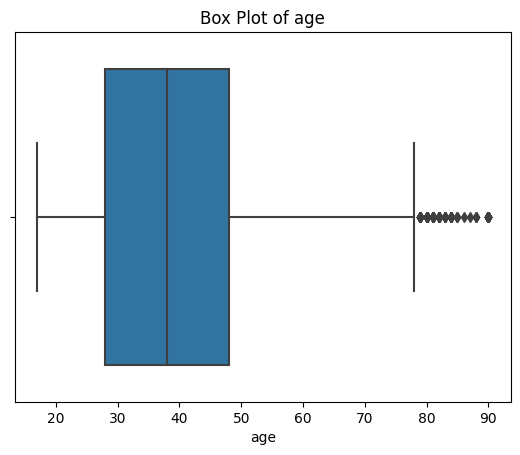

age
31.0    0.027567
36.0    0.027498
34.0    0.027189
28.0    0.026812
33.0    0.026743
          ...   
83.0    0.000206
88.0    0.000103
85.0    0.000103
86.0    0.000034
87.0    0.000034
Name: age, Length: 74, dtype: float64


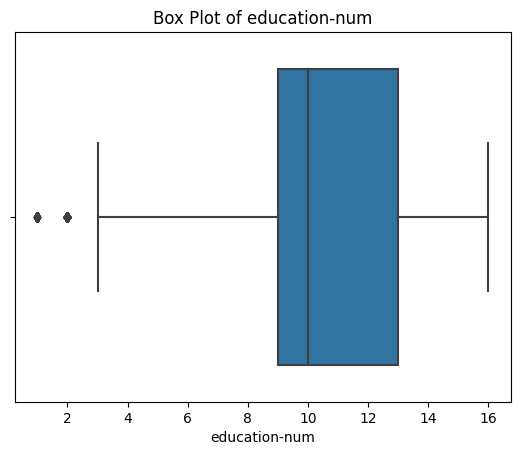

education-num
9     0.305160
10    0.219403
13    0.165505
14    0.056816
11    0.045693
7     0.036390
12    0.036150
6     0.029833
4     0.021594
15    0.019362
5     0.017371
8     0.014247
16    0.013801
3     0.011260
2     0.005699
1     0.001717
Name: education-num, dtype: float64


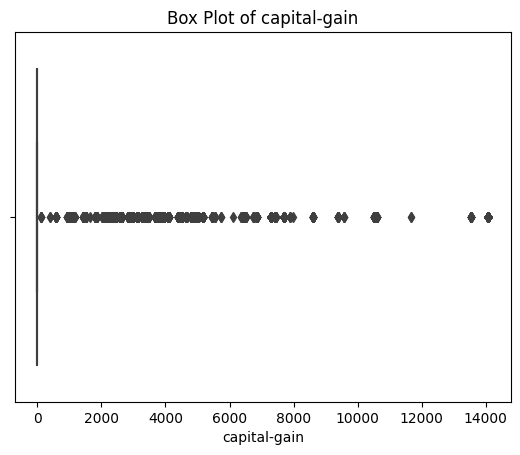

capital-gain
0        0.907549
14084    0.022932
7688     0.009612
7298     0.008377
3103     0.003330
           ...   
1111     0.000034
1639     0.000034
7978     0.000034
2387     0.000034
5060     0.000034
Name: capital-gain, Length: 106, dtype: float64


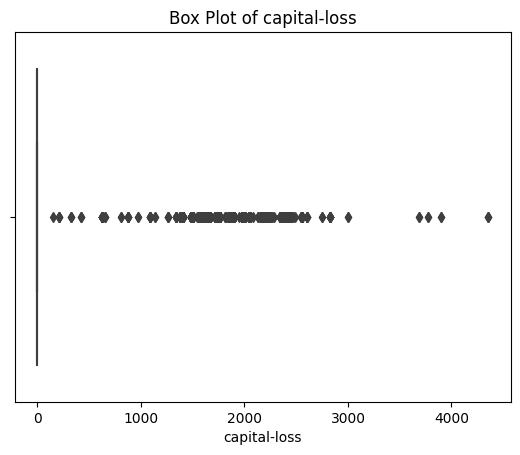

capital-loss
0       0.948127
1902    0.006935
1977    0.005699
1887    0.005390
1485    0.001751
          ...   
2080    0.000034
1539    0.000034
1844    0.000034
2489    0.000034
1411    0.000034
Name: capital-loss, Length: 92, dtype: float64


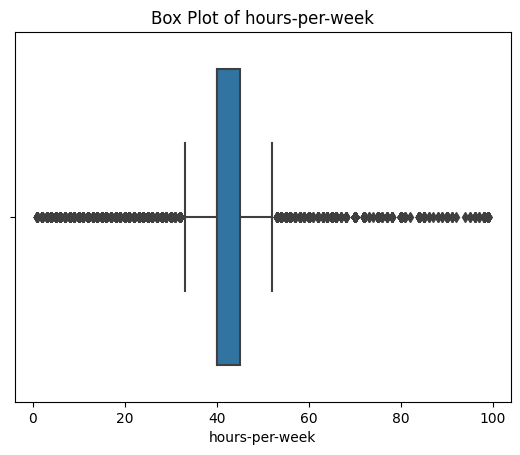

hours-per-week
40.0    0.442068
50.0    0.088709
45.0    0.058224
60.0    0.047925
35.0    0.042089
          ...   
82.0    0.000034
94.0    0.000034
92.0    0.000034
87.0    0.000034
74.0    0.000034
Name: hours-per-week, Length: 94, dtype: float64


In [30]:
for col in list(df.select_dtypes(include='number').columns):
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()
    print(col)
    print(df[col].value_counts(dropna=False, normalize=True))

capital-gain and capital-loss are highly imbalanced so I will convert it into a binary feature of capital gain/loss = 0

In [31]:
# convert capital gain/loss into a binary feature of gain/loss = 0
for col in ('capital-gain', 'capital-loss'):
    df[str('no_') + col] = np.where(df[col] == 0, True, False)
    df.drop(columns=col, inplace=True)
list(df.columns)

['age',
 'workclass',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'hours-per-week',
 'native-country',
 'income_binary',
 'age_na',
 'workclass_na',
 'occupation_na',
 'hours-per-week_na',
 'native-country_na',
 'no_capital-gain',
 'no_capital-loss']

In [32]:
print('numerical features: ')
print(list(df.select_dtypes(include='number').columns))

numerical features: 
['age', 'education-num', 'hours-per-week']


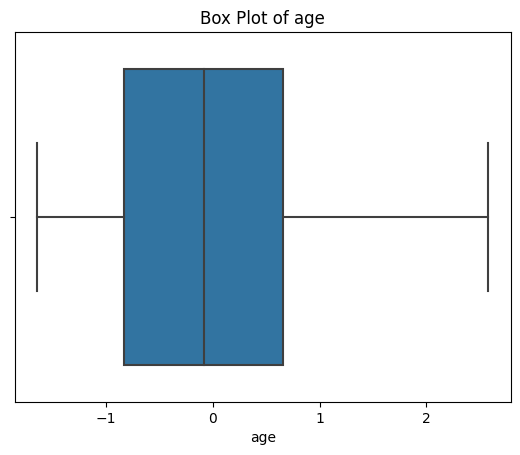

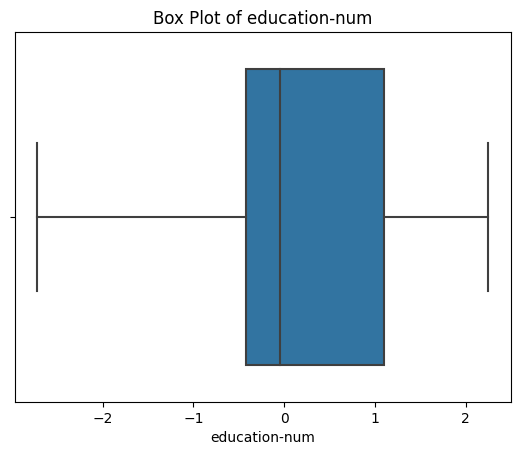

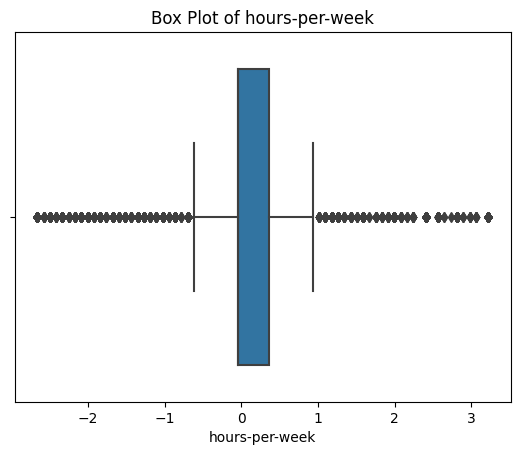

In [33]:
for col in df.select_dtypes(include='number').columns:
    df[col] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])
    df[col] = stats.zscore(df[col])
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

#### One-hot encode features

In [35]:
# show number of unique values in each feature
df.select_dtypes(include='object').nunique()

workclass          3
marital-status     4
occupation        15
relationship       6
race               5
sex_selfID         2
native-country     7
income_binary      2
dtype: int64

In [36]:
to_encode = list(df.drop(columns='marital-status').select_dtypes(include=['object']).columns)
print('features to encode: ')
print(df[to_encode].nunique())

features to encode: 
workclass          3
occupation        15
relationship       6
race               5
sex_selfID         2
native-country     7
income_binary      2
dtype: int64


In [37]:
# one-hot encode each feature
for col in to_encode:
    df_new = pd.get_dummies(df[col], prefix=col + '_')
    df = df.join(df_new)
df.drop(columns=to_encode, inplace=True)

In [38]:
df.head()

,age,education-num,marital-status,hours-per-week,age_na,workclass_na,occupation_na,hours-per-week_na,native-country_na,no_capital-gain,...,sex_selfID__Non-Female,native-country__Asia,native-country__Europe,native-country__Latin America,native-country__North America,native-country__South,native-country__United-States,native-country__Unknown,income_binary__<=50K,income_binary__>50K
0,-0.013191,1.103339,Never-married,-0.047497,False,False,False,False,False,False,...,1,0,0,0,0,0,1,0,1,0
1,0.802538,1.103339,Married_together,-2.253829,False,False,False,False,False,True,...,1,0,0,0,0,0,1,0,1,0
2,-0.087348,-0.424878,Previously married,-0.047497,False,False,False,False,False,True,...,1,0,0,0,0,0,1,0,1,0
3,1.025009,-1.188986,Married_together,-0.047497,False,False,False,False,False,True,...,1,0,0,0,0,0,1,0,1,0
4,-0.828919,1.103339,Married_together,-0.047497,False,False,False,False,False,True,...,0,0,0,0,1,0,0,0,1,0


### Train LogisticRegression model

In [39]:
y = df['marital-status']
X = df.drop(columns='marital-status')

print("Number of examples: " + str(X.shape[0]))
print("Number of Features:" + str(X.shape[1]))

Number of examples: 29129
Number of Features:50


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

gridsearch to find best C value

In [41]:
# list of possible C for model
param_grid = {'C': [10**i for i in range(-5,5)]}

param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [42]:
print('Running Grid Search...')

model_gridsearch = LogisticRegression(max_iter=1000, class_weight='balanced')

# grid search with 5-fold cross-validation 

grid = GridSearchCV(model_gridsearch, param_grid, cv=5)

# fit model

grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [43]:
# save best parameters
best_C = grid_search.best_estimator_.C

best_C

0.01

find best number of features to shorten training time

In [44]:
avg_auc_vals = []
best_x_features = []

num_features = X_train.shape[1]

for x in range(1, num_features):
    # k=x is specifying that we want the top x features
    selector = SelectKBest(f_classif, k=x)
    selector.fit(X, y)
    filter = selector.get_support()
    top_x_features = list(X.columns[filter])
    best_x_features.append(top_x_features)
    
    print(f"Best {x} features:")
    # print(top_x_features)
    
    # Create new training and test data for features
    new_X_train = X_train[top_x_features]
    new_X_test = X_test[top_x_features]
    
    
    # LogisticRegression model object with the best value of hyperparameter C 
    model = LogisticRegression(max_iter=1000, C=best_C)
    model.fit(new_X_train, y_train)
    
    
    # make predictions on the new test data
    proba_predictions = model.predict_proba(new_X_test)
    
    auc_vals = []
    # Compute the auc-roc for each output
    for c in model.classes_:
        fpr, tpr, thresholds = roc_curve((y_test == c), proba_predictions[:, list(model.classes_).index(c)])
        auc_result = auc(fpr, tpr)
        auc_vals.append(auc_result)
        print(f'\t{c}:   {auc_result}')

    # save avg auc score
    auc_avg = np.mean(auc_vals)
    avg_auc_vals.append(auc_avg)
    print()
print(best_x_features[-1])

Best 1 features:
	Married_apart:   0.712035010940919
	Married_together:   0.9332662642521797
	Never-married:   0.7919993973180655
	Previously married:   0.7446351931330473

Best 2 features:
	Married_apart:   0.7010457483079742
	Married_together:   0.9643237070499087
	Never-married:   0.8030709692405398
	Previously married:   0.7851600413314261

Best 3 features:
	Married_apart:   0.780639777758245
	Married_together:   0.976768392455903
	Never-married:   0.9313326358748042
	Previously married:   0.9040054711437701

Best 4 features:
	Married_apart:   0.7933994800172094
	Married_together:   0.9797999410209635
	Never-married:   0.9412175005386875
	Previously married:   0.9035554148512753

Best 5 features:
	Married_apart:   0.8369496578938846
	Married_together:   0.9939792668679609
	Never-married:   0.941554433357473
	Previously married:   0.924429248149947

Best 6 features:
	Married_apart:   0.8399722891733474
	Married_together:   0.9951783767890525
	Never-married:   0.9428852547060225
	Pre

In [45]:
best_avg_auc_val = max(avg_auc_vals)
best_num_features = range(1, num_features)[avg_auc_vals.index(best_avg_auc_val)]
best_features = best_x_features[avg_auc_vals.index(best_avg_auc_val)]

print(f'best num of features: {best_num_features}')
print(f'corresponding avg auc val: {best_avg_auc_val}')
print(f'corresponding features: {best_features}\n')
print()
print(f'avg auc vals: \n{avg_auc_vals}')

best num of features: 48
corresponding avg auc val: 0.9363381875911378
corresponding features: ['age', 'education-num', 'hours-per-week', 'age_na', 'workclass_na', 'occupation_na', 'native-country_na', 'no_capital-gain', 'no_capital-loss', 'workclass__Not-self-emp', 'workclass__Self-emp', 'workclass__Unknown', 'occupation__Adm-clerical', 'occupation__Armed-Forces', 'occupation__Craft-repair', 'occupation__Exec-managerial', 'occupation__Farming-fishing', 'occupation__Handlers-cleaners', 'occupation__Machine-op-inspct', 'occupation__Other-service', 'occupation__Priv-house-serv', 'occupation__Prof-specialty', 'occupation__Protective-serv', 'occupation__Sales', 'occupation__Tech-support', 'occupation__Transport-moving', 'occupation__Unknown', 'relationship__Husband', 'relationship__Not-in-family', 'relationship__Other-relative', 'relationship__Own-child', 'relationship__Unmarried', 'relationship__Wife', 'race__Amer-Indian-Inuit', 'race__Asian-Pac-Islander', 'race__Black', 'race__Other', 'r

compare with default model

In [46]:
# default model
model_default = LogisticRegression(max_iter=1000, class_weight='balanced')

t0 = time.time() # start time

# Fit the model 
model_default.fit(X_train, y_train)

t1 = time.time() # stop time
default_time = t1-t0

# Make predictions on the test data 
probability_predictions_default = model_default.predict_proba(X_test)

# Compute the log loss 
l_loss_default = log_loss(y_test, probability_predictions_default)
print('Log loss: ' + str(l_loss_default))

# Make predictions 
class_label_predictions_default = model_default.predict(X_test)

# Compute the accuracy score 
acc_score_default = accuracy_score(y_test, class_label_predictions_default)
print('Accuracy: ' + str(acc_score_default))
print('Elapsed time: %.2fs' % (t1-t0))

Log loss: 0.4693991206279413
Accuracy: 0.8176427754083012
Elapsed time: 0.46s


In [47]:
best_X_train = X_train[best_features]
best_X_test = X_test[best_features]

# Create best LogisticRegression model 
model = LogisticRegression(max_iter=1000, C=best_C, class_weight='balanced')

t0 = time.time() # start time

# Fit the model 
model.fit(best_X_train, y_train)

t1 = time.time() # stop time
best_time = t1-t0

# Make predictions on the test data 
probability_predictions = model.predict_proba(best_X_test)

# Compute the log loss 
l_loss = log_loss(y_test, probability_predictions)
print('Log loss: ' + str(l_loss))

# Make predictions 
class_label_predictions = model.predict(best_X_test)

# Compute the accuracy score 
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))
print('Elapsed time: %.2fs' % (t1-t0))

Log loss: 0.5197429803024937
Accuracy: 0.8178508270050973
Elapsed time: 0.20s


In [48]:
print(f'best to default training time ratio: {best_time/default_time*100: .2f}%')

best to default training time ratio:  43.33%


In [49]:
# create confusion matrix for best model
c_m = confusion_matrix(y_test, class_label_predictions, labels=model.classes_)
print('Confusion Matrix for the best model: ')
pd.DataFrame(
c_m,
columns=['Predicted: ' + str(c) for c in model.classes_],
index=['Actual: ' + str(c) for c in model.classes_]
)

Confusion Matrix for the best model: 


,Predicted: Married_apart,Predicted: Married_together,Predicted: Never-married,Predicted: Previously married
Actual: Married_apart,209,0,108,156
Actual: Married_together,21,4387,56,9
Actual: Never-married,407,1,2187,381
Actual: Previously married,356,0,256,1079


#### Plot performances

In [50]:
model_classes = list(model.classes_)

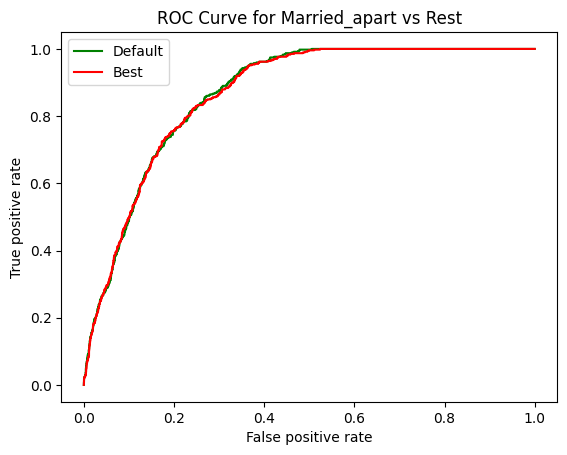

best model auc: 0.8659057369275679
default model auc: 0.8670301303195304


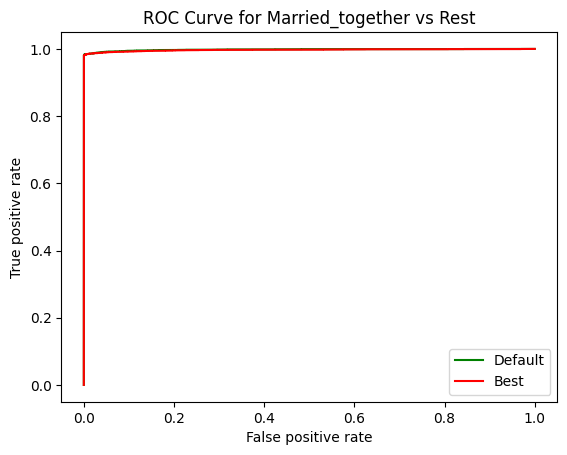

best model auc: 0.9969079500783342
default model auc: 0.9979294922148543


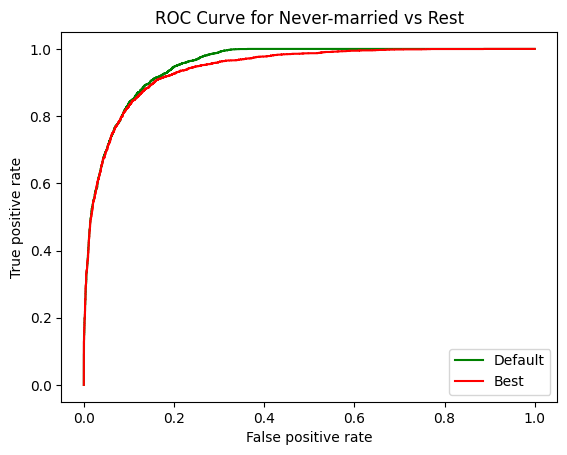

best model auc: 0.9425138438632561
default model auc: 0.9520242852872702


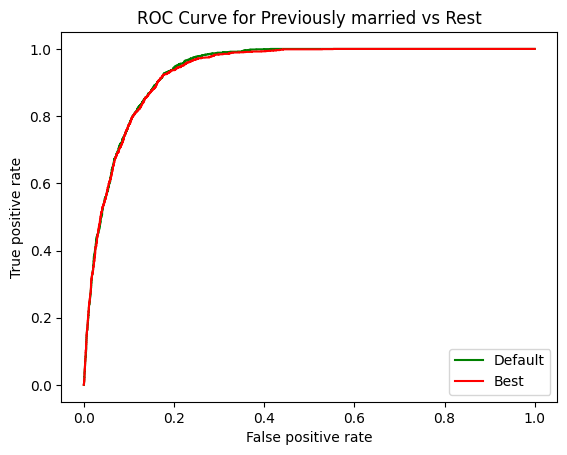

best model auc: 0.9343852413187059
default model auc: 0.936268326413161


In [51]:
# plot roc curve for each class
for c in model_classes:
    fpr_best, tpr_best, thresholds_best = roc_curve((y_test == c), probability_predictions[:, model_classes.index(c)])
    fpr_default, tpr_default, thresholds_default = roc_curve((y_test == c), probability_predictions_default[:, model_classes.index(c)])
    auc_best = auc(fpr_best, tpr_best)
    auc_default = auc(fpr_default, tpr_default)
    
    plt.figure()
    plt.plot(fpr_default, tpr_default, color='green', label='Default')
    plt.plot(fpr_best, tpr_best, color='red', label='Best')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(f'ROC Curve for {c} vs Rest')
    plt.legend()
    plt.show()
    print(f'best model auc: {auc_best}')
    print(f'default model auc: {auc_default}')

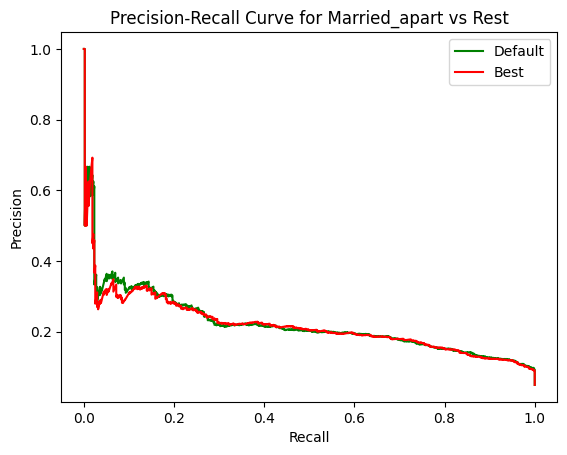

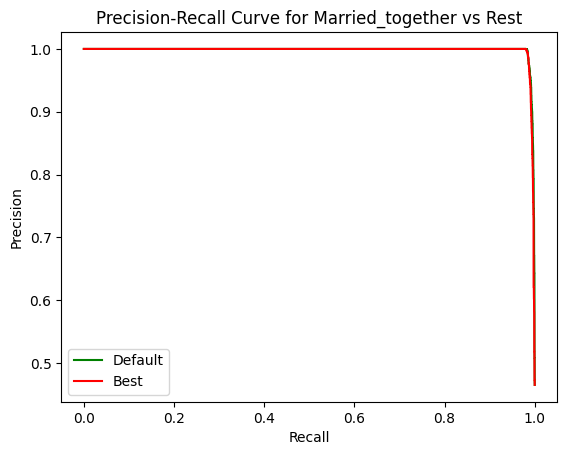

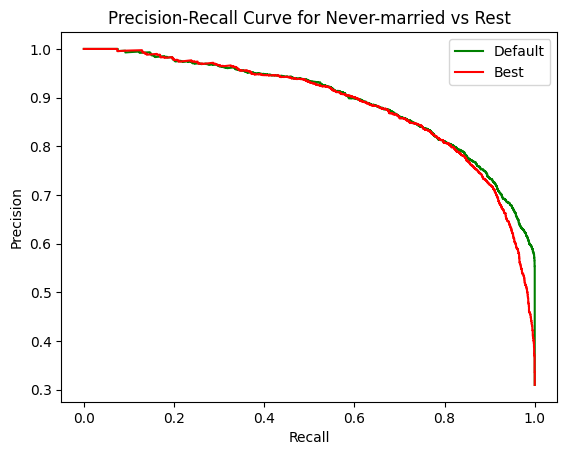

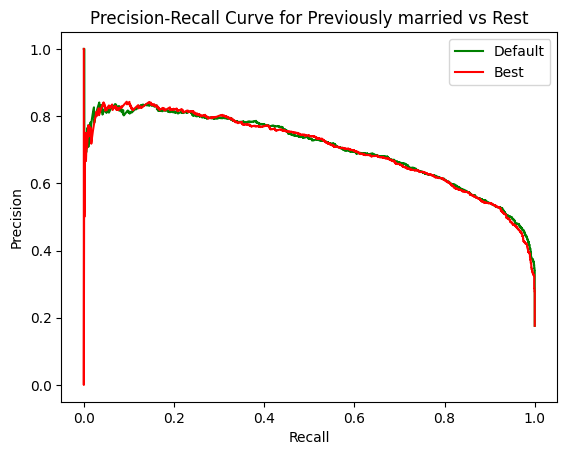

In [52]:
# plot precision-recall for each class
for c in model_classes:
    precision_best, recall_best, thresholds_best = precision_recall_curve((y_test == c), probability_predictions[:, model_classes.index(c)])
    precision_default, recall_default, thresholds_default = precision_recall_curve((y_test == c), probability_predictions_default[:, model_classes.index(c)])
    
    plt.figure()
    plt.plot(recall_default, precision_default, color='green', label='Default')
    plt.plot(recall_best, precision_best, color='red', label='Best')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {c} vs Rest')
    plt.legend()
    plt.show()

#### Findings

after reducing the number of features, the training time was reduced by ~53%.

looking at the roc curves, the model is very good at separating classes, meaning it is able to differentiate between classes well. 

looking at the precision-recall curve, the 'Married-Apart' class of 'marital-status' is the most difficult to predict. this is likely because of the class imbalance in the label since there significantly fewer data points with 'Married-Apart'.

the best model has a log loss of ~0.52, an accuracy score ~0.82 of and an auc value of ~0.94.

for future improvements to performance, i could either find more data on people that are 'Married-Apart' or select sampling data to improve feature and label imbalances.

#### Make Model Persistent

In [53]:
import pickle

In [54]:
# save model to file
pkl_model_filename = 'marital_status_model.pkl'
pickle.dump(model, open(pkl_model_filename, 'wb'))

In [55]:
# test saved model
model_loaded = pickle.load(open(pkl_model_filename, 'rb'))
predictions = model_loaded.predict(best_X_test)
predictions

array(['Married_apart', 'Married_together', 'Never-married', ...,
       'Married_apart', 'Married_together', 'Never-married'], dtype=object)